<a class="anchor" id="0"></a>
# DEMO: MNIST Handwritten Digits - Deep Neural Network with Keras

In this notebook, we  built a deep neural network on MNIST handwritten digit images to classify them.   
MNIST is called Hello World of Deep Learning. So, it is actually an image recognition task.   
It helps to understand and built a deep neural network with Keras.

This kernel is based on the following Kaggle kernel:

- [My previous kernel on Artificial Neural Network](https://www.kaggle.com/prashant111/comprehensive-guide-to-ann-with-keras)

- [Deep Neural Network Keras way by Poonam Ligade](https://www.kaggle.com/poonaml/deep-neural-network-keras-way)

- [MNIST with Keras for beginners by Aditya Soni](https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457)


I thank the authors (Poonam Ligade and Aditya Soni) for their excellent work.

---  
Source/Links:  
+ [Kaggle Notebook](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras)

History:  
+ Oct'2024, dbe --- adapted for KETE HS24

---

<a class="anchor" id="0.1"></a>
# Table of contents


1.	[Objective of the notebook](#1)
1.	[Import necessary libraries](#2)
1.	[MNIST dataset](#3)
1.	[Data visualization](#4)
1.	[Designing model architecture using Keras](#5)
    - 5.1 [Import Keras layers](#5.1)
    - 5.2 [Compute the number of labels](#5.2)
    - 5.3 [One-Hot Encoding](#5.3)
    - 5.4 [Data Preprocessing](#5.4)
    - 5.5 [Setting network parameters](#5.5)
    - 5.6 [Designing the model architecture](#5.6)
    - 5.7 [View model summary](#5.7)
1.	[Implement MLP model using Keras](#6)
    - 6.1 [Compile the model with compile() method](#6.1)
    - 6.2 [Train the model with fit() method](#6.2)
    - 6.3 [Evaluate model performance with evaluate() method](#6.3)
1.	[Overfitting and Regularization](#7)
1.	[Results and Conclusion](#8)
1.	[References](#9)


---  
# 1. Objective of the notebook <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

- In this notebook, we create a **Multilayer Perceptron (MLP)** model of the MNIST dataset.

- **Multilayer Perceptrons (MLPs)** usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting the data.

- These MLP models are also referred to as either **deep feedforward networks** or **feedforward neural networks**. MLPs are common in simple logistic and linear regression problems.

- So, the objective is to create a neural network for identifying numbers based on handwritten digits. For example, when the input to the network is an image of a handwritten number 8, the corresponding prediction must also be the digit 8.

- To both train and validate a neural network, there must be a sufficiently large dataset of handwritten digits.

- The Modified National Institute of Standards and Technology dataset or MNIST dataset for short, is often considered as the Hello World! of deep learning and is a suitable dataset for handwritten digit classification.

- MNIST is used to explain and validate deep learning theories because the 70,000 samples it contains are small, yet sufficiently rich in information (MNIST dataset is described later).

So, we will start by importing the necessary libraries:

---  
# 2. Import necessary libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


---  
# 3. MNIST dataset <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

- To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

- The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.

In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


---  
# 4. Data visualization <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)


- The following code will help to sample the 25 random MNIST digits and visualize them.

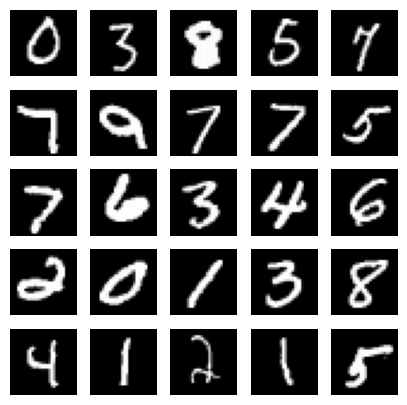

In [3]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

---  
# 5. Designing Model Architecture using Keras <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)


- The MLP model, discussed above can be used for MNIST digits classification.

- When the units or perceptrons are exposed, the MLP model is a fully connected network.

- The following code shows how to design the MLP model architecture using Keras.

- The first step in designing the model architecture is to import the Keras layers. This can be done as follows:




## 5.1 Import Keras layers <a class="anchor" id="5.1"></a>

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

## 5.2 Compute the number of labels <a class="anchor" id="5.2"></a>

- Now, the data must be in the correct shape and format.

- After loading the MNIST dataset, the number of labels is computed as:

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))

## 5.3 One-Hot Encoding <a class="anchor" id="5.3"></a>

- At this point, the labels are in digits format, 0 to 9.

- This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

- A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

- For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

- The following lines convert each label into a one-hot vector:

In [8]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## 5.4 Data Preprocessing <a class="anchor" id="5.4"></a>


- In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

- The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

- The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.  

- The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 * 28] and [10000, 28 * 28], respectively.

In [11]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [12]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## 5.5 Setting network parameters <a class="anchor" id="5.5"></a>

- Now, we will set the network parameters as follows:

In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

- The **batch_size** argument indicates the number of data that we will use for each update of the model parameters.

- **Hidden_units** shows the number of hidden units.

- **Dropout** is the dropout rate (more on this in section 7 - **Overfitting and Regularization**).

## 5.6 Designing the model architecture <a class="anchor" id="5.6"></a>


- The next step is to design the model architecture. The proposed model is made of three MLP layers.

- In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.

- Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout.

- 256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.

- The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

`from keras.models import Sequential`

`model = Sequential()`

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

- In Keras, we can add the required types of layers through the **add()** method.

In [14]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function.

- The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings.

- relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

## 5.7 View model summary <a class="anchor" id="5.7"></a>

- Keras library provides us **summary()** method to check the model description.

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

- The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.

- This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient.

- The total number of parameters required can be computed as follows:

  - From input to Dense layer: 784 × 256 + 256 = 200,960.
  
  - From first Dense to second Dense: 256 × 256 + 256 = 65,792.
  
  - From second Dense to the output layer: 10 × 256 + 10 = 2,570.
  
  - The total is 200,690 + 65,972 + 2,570 = 269,322.

- Another way of verifying the network is by calling the **plot_model()** method as follows:

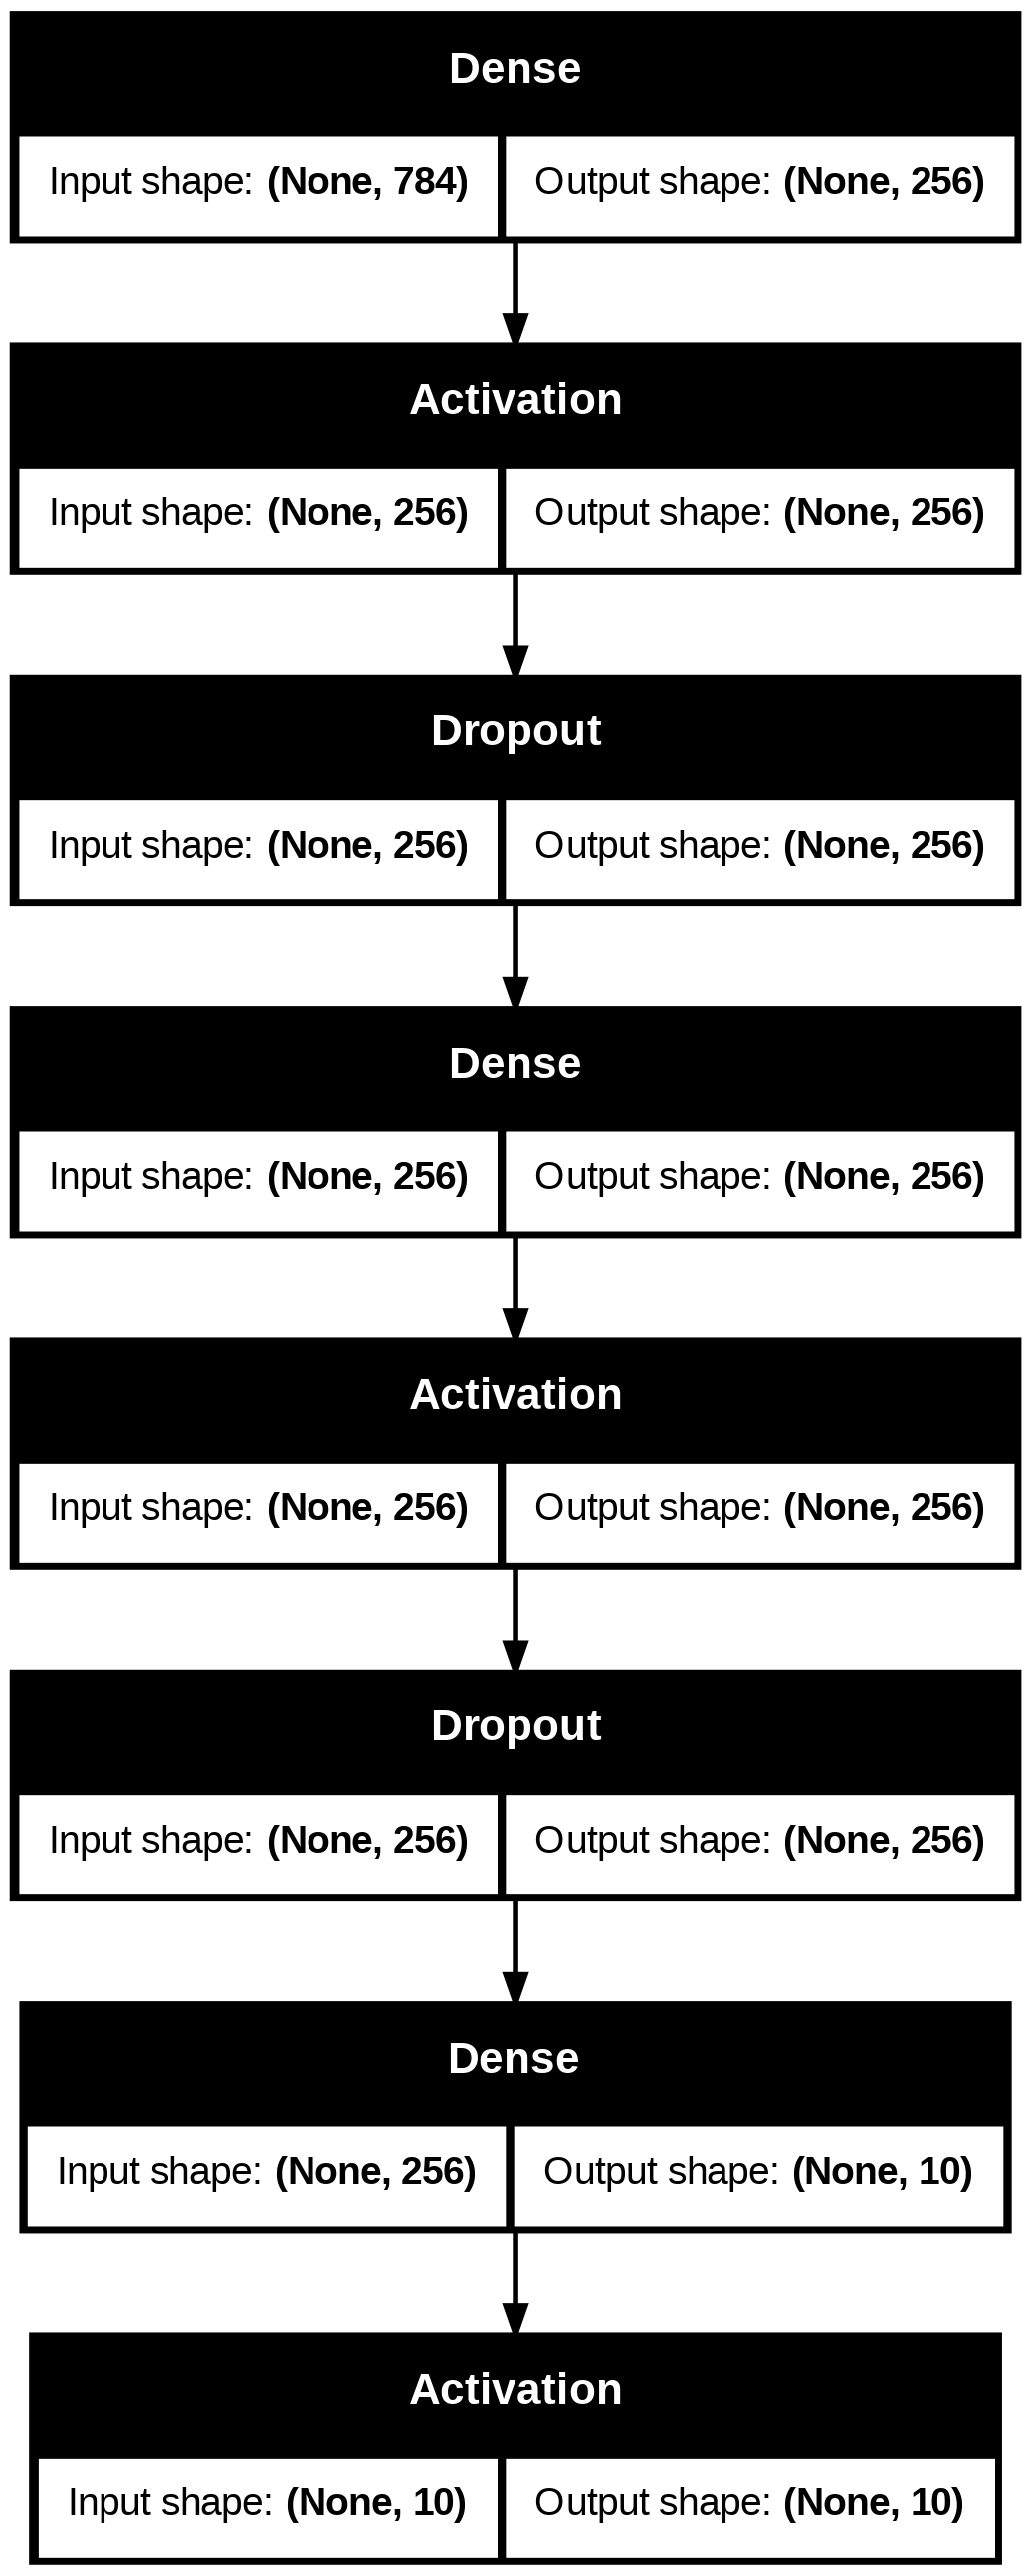

In [16]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

---  
# 6. Implement MLP model using Keras <a class="anchor" id="6"></a>


[Back to Table of Contents](#0.1)


- The implementation of MLP model in Keras comprises of three steps:-

  - Compiling the model with the compile() method.
  
  - Training the model with fit() method.
  
  - Evaluating the model performance with evaluate() method.
  
  
- For detailed discussion on implementation, please refer to my previous kernel [Comprehensive Guide to ANN with Keras](https://www.kaggle.com/prashant111/comprehensive-guide-to-ann-with-keras)

## 6.1 Compile the model with compile() method <a class="anchor" id="6.1"></a>


- Compilation of model can be done as follows:

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Loss function (categorical_crossentropy)

- How far the predicted tensor is from the one-hot ground truth vector is called **loss**.

- In this example, we use **categorical_crossentropy** as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

- There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.

- For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

### Optimization (optimizer adam)

- With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

- In Keras, there are several choices for optimizers. The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**.

- Each optimizer features tunable parameters like learning rate, momentum, and decay.

- Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

### Metrics (accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

- During training, validation, and testing, other metrics such as **accuracy** can also be included.

- **Accuracy** is the percent, or fraction, of correct predictions based on ground truth.

## 6.2 Train the model with fit() method <a class="anchor" id="6.2"></a>

In [18]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7671 - loss: 0.7458
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9390 - loss: 0.2039
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9531 - loss: 0.1535
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9614 - loss: 0.1292
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1116
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1055
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0904
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0876
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0805
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0746
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0715
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## 6.3 Evaluating model performance with evaluate() method <a class="anchor" id="6.3"></a>

In [19]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9797 - loss: 0.0734

Test accuracy: 98.2%


---  
# 7. Overfitting and Regularization <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)


- A neural network has the property to memorize the characteristics of training data. This is called **overfitting**.

- In such a case, the network fails to generalize when subject to the test data.

- To avoid this tendency, the model uses a regularizing layer or function. A commonly used regularizing layer is referred to as a **Dropout layer**.

- Given a dropout rate (dropout=0.45), the **Dropout layer** randomly removes the fraction of units from participating in the next layer. For example, if the first layer has 256 units, after dropout=0.45 is applied, only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2.

- The Dropout layer makes neural networks robust to unforeseen input data because the network is trained to predict correctly, even if some units are missing.

- The dropout is not used in the output layer and it is only active during training. Moreover, dropout is not present during prediction.

- There are regularizers that can be used other than dropouts like l1 or l2. In Keras, the bias, weight and activation output can be regularized per layer. - l1 and l2 favor smaller parameter values by adding a penalty function. Both l1 and l2 enforce the penalty using a fraction of the sum of absolute (l1) or square (l2) of parameter values.

- So, the penalty function forces the optimizer to find parameter values that are small. Neural networks with small parameter values are more insensitive to the presence of noise from within the input data.

- So, the l2 weight regularizer with fraction=0.001 can be implemented as:

In [20]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))

- No additional layer is added if l1 or l2 regularization is used. The regularization is imposed in the Dense layer internally. For the proposed model, dropout still has a better performance than l2.

---  
# 8. Results and Conclusion <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)


- In this kernel, I build a dense neural network model to classify the MNIST digits and predict accuracy.

- We get the test accuracy of 98.3%.

- The accuracy tells us that our ANN model classifies the digits 98.3% of time correctly.



---   
# 9. References <a class="anchor" id="9"></a>


[Back to Table of Contents](#0.1)


This kernel is based on the following Kaggle kernels and books:

- [My previous kernel on Artificial Neural Network](https://www.kaggle.com/prashant111/comprehensive-guide-to-ann-with-keras)

- [Deep Neural Network Keras way by Poonam Ligade](https://www.kaggle.com/poonaml/deep-neural-network-keras-way)

- [MNIST with Keras for beginners by Aditya Soni](https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457)

-	Deep Learning with Python by Francois Chollet

-	Advanced Deep Learning with Keras by Rowel Atienza
